# Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to produce a more accurate and stable prediction. Instead of relying on a single decision tree, Random Forest considers the prediction of each tree and chooses the class (in classification tasks) that gets the most votes or averages the results (in regression tasks).

<br>

---

<br>


![Random Forest](https://www.nvidia.com/content/dam/en-zz/Solutions/glossary/data-science/random-forest/img-3.png)

## How Does It Work?

**Bootstrap Aggregating (Bagging):**
<br>
Random Forest begins by creating multiple datasets from the original dataset using a method called bootstrap sampling. This means it randomly samples the original dataset with replacement, producing different datasets of the same size.

**Building Decision Trees:**
<br>
 For each bootstrapped dataset, a decision tree is constructed. But, there's a twist: instead of finding the best feature to split on, Random Forest selects a random subset of features at each split point and chooses the best feature from this subset.

 ---

**Aggregating Results:**
<br>


1.   **Classification:** Each decision tree in the forest "votes" for a class, and the class with the most votes becomes the model's prediction.

2.   **Regression:** The predictions of individual trees are averaged to get the final prediction.

<br>

---

<br>




## Key Advantages:

Accuracy: Combining multiple trees usually results in a model that performs better than any of its individual parts.

Overfitting: The algorithm is less prone to overfitting compared to a single decision tree because it averages out biases.

Handle Missing Values: It can handle datasets with missing values and still provide accurate predictions.

Feature Importance: Random Forest provides insights into the importance of different features in making predictions.

Versatility: Suitable for both classification and regression tasks and works well with large datasets.

Limitations:
Complexity: A forest with a large number of trees can be computationally expensive and slow to run.

Less Intuitive: While a single decision tree can be visualized and easily understood, a Random Forest with hundreds of trees is harder to interpret.

Predictive Latency: Due to its ensemble nature, making predictions can be slower, especially if the forest is large. This makes it less suitable for real-time predictions.





---
Reference: [Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

Let's take an example to explain Random Forest!

# Step 1 : Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Step 2 : Data Read

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['adult.csv']))
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#Step 3 : Data Preprocessing



Goals for preprocessing:
*   Check for '?'
*   Check for '0'



In [ ]:
data = df.replace('?', np.nan)

In [ ]:
# Checking null values with '?'
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [ ]:
nan_cols = ['workclass', 'occupation', 'native.country']

In [ ]:
for col in nan_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [ ]:
data = data.replace(0, np.nan)

In [ ]:
# Checking null values with 0
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass           0.0 %
fnlwgt              0.0 %
education           0.0 %
education.num       0.0 %
marital.status      0.0 %
occupation          0.0 %
relationship        0.0 %
race                0.0 %
sex                 0.0 %
capital.gain      91.67 %
capital.loss      95.33 %
hours.per.week      0.0 %
native.country      0.0 %
income              0.0 %
dtype: object

In [ ]:
zero_nan_cols = ['capital.gain','capital.loss']

In [ ]:
for col in zero_nan_cols:
    data[col].fillna(data[col].mean(), inplace=True)



In [ ]:
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,12938.541298,4356.0,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.0,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,12938.541298,4356.0,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.0,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.0,40,United-States,<=50K


Perfect! We have succesfully Preprocessed the Data.

In [ ]:
# Replacing The income to a Classification Outcome 0 and 1.

data = data.replace('<=50K', 0)
data = data.replace('>50K', 1)
data.head(30)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,12938.541298,4356.0,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.0,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,12938.541298,4356.0,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.0,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.0,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,12938.541298,3770.0,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,12938.541298,3770.0,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,12938.541298,3683.0,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,12938.541298,3683.0,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,12938.541298,3004.0,60,United-States,1


###*Equal-Width Discretization*

Lets Divide the Continuous Attributes into Intervals for better preprocessed Data, and then followed by Label Encoding.


*   I have stated my intuitions for the Width dicretization of few feature columns.
*   Try to figure out for other feature columns, or you can reach out to me @f20200980@hyderabad.bits-pilani.ac.in for queries.



In [ ]:
# Define the continuous attributes that need to be discretized
continuous_attributes = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Discretize the continuous attributes using appropriate techniques
num_bins = 10  # Define the number of bins for discretization

for attribute in continuous_attributes:
    # Perform discretization using the cut() function
    if(attribute == 'age'):

      # Intuition: Since below 18 age group people have generally no income, lets take the interval 1 from [0,18] and similarlly, bachelor, senior groups etc.
      data[attribute+'_discrete']=pd.cut(data[attribute], [0, 18, 22, 45, 65, 100], labels=["Young", "Junior", "middle-aged","senior","old"], right= True, include_lowest=True)


    elif(attribute == 'capital.gain'):

      #Intuition: Since there may also exist a Rickshaw Driver and also Ambani in an income dataset, Lets discretize the data to
      #           high, low etc instead of jusyt replacing with the mean of the feature coloumn.

      data[attribute+'_discrete']=pd.cut(data[attribute], [0, 1, 7298, 99999], labels=["None", "Low", "High"], right= True, include_lowest=True)

    elif(attribute == 'capital.loss'):

      data[attribute+'_discrete']=pd.cut(data[attribute], [0, 1, 1887, 4500], labels=["None", "Low", "High"], right= True, include_lowest=True)

    elif(attribute == 'hours.per.week'):

      data[attribute+'_discrete']=pd.cut(data[attribute], [0,25,40,60,100], labels=["part-time", "full-time", "Over-time","Too-much"], right= True, include_lowest=True)

    else: data[attribute+'_discrete'] = pd.cut(data[attribute], num_bins)

# Print the updated Data with discretized attributes
data.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,capital.loss,hours.per.week,native.country,income,age_discrete,fnlwgt_discrete,education.num_discrete,capital.gain_discrete,capital.loss_discrete,hours.per.week_discrete
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,4356.0,40,United-States,0,old,"(10812.58, 159527.0]","(8.5, 10.0]",High,High,full-time
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,4356.0,18,United-States,0,old,"(10812.58, 159527.0]","(8.5, 10.0]",High,High,part-time
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,4356.0,40,United-States,0,old,"(159527.0, 306769.0]","(8.5, 10.0]",High,High,full-time
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,3900.0,40,United-States,0,senior,"(10812.58, 159527.0]","(2.5, 4.0]",High,High,full-time
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,3900.0,40,United-States,0,middle-aged,"(159527.0, 306769.0]","(8.5, 10.0]",High,High,full-time


###Discretized Data

In [ ]:
discrete_data = data.drop(['age'],axis=1)
discrete_data = discrete_data.drop(['fnlwgt'],axis=1)
discrete_data = discrete_data.drop(['education.num'],axis=1)
discrete_data = discrete_data.drop(['capital.gain'],axis=1)
discrete_data = discrete_data.drop(['capital.loss'],axis=1)
discrete_data = discrete_data.drop(['hours.per.week'],axis=1)
discrete_data.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age_discrete,fnlwgt_discrete,education.num_discrete,capital.gain_discrete,capital.loss_discrete,hours.per.week_discrete
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,0,old,"(10812.58, 159527.0]","(8.5, 10.0]",High,High,full-time
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,0,old,"(10812.58, 159527.0]","(8.5, 10.0]",High,High,part-time
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,0,old,"(159527.0, 306769.0]","(8.5, 10.0]",High,High,full-time
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,0,senior,"(10812.58, 159527.0]","(2.5, 4.0]",High,High,full-time
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,0,middle-aged,"(159527.0, 306769.0]","(8.5, 10.0]",High,High,full-time


###Label Encoding

Our Next **Goal** is to Now Convert categorical Data into Label Encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder

labels=['age_discrete', 'workclass', 'fnlwgt_discrete', 'education', 'education.num_discrete',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain_discrete', 'capital.loss_discrete', 'hours.per.week_discrete', 'native.country']
for label in labels:
  discrete_data[label+'_n']= LabelEncoder().fit_transform(discrete_data[label])
discrete_data.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age_discrete,...,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,0,old,...,5,6,9,1,4,0,0,0,2,38
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,0,old,...,5,6,3,1,4,0,0,0,3,38
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,0,old,...,5,6,9,4,2,0,0,0,2,38
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,0,senior,...,1,0,6,4,4,0,0,0,2,38
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,0,middle-aged,...,5,5,9,3,4,0,0,0,2,38


In [ ]:
discrete_data=discrete_data.drop(['age_discrete', 'workclass', 'fnlwgt_discrete', 'education', 'education.num_discrete',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain_discrete', 'capital.loss_discrete', 'hours.per.week_discrete', 'native.country'], axis='columns')

In [ ]:
discrete_data = discrete_data.rename(columns={'income':'income_n'})

In [ ]:
discrete_data.head()

,income_n,age_discrete_n,workclass_n,fnlwgt_discrete_n,education_n,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
0,0,3,3,0,11,5,6,9,1,4,0,0,0,2,38
1,0,3,3,0,11,5,6,3,1,4,0,0,0,3,38
2,0,3,3,1,15,5,6,9,4,2,0,0,0,2,38
3,0,4,3,0,5,1,0,6,4,4,0,0,0,2,38
4,0,2,3,1,15,5,5,9,3,4,0,0,0,2,38


Voila! Our dataset is ready to Go for Analysis.

#Step 3 : Data Preprocessing



Goals for preprocessing:
*   Check for '?'
*   Check for '0'



In [ ]:
data = df.replace('?', np.nan)

In [ ]:
# Checking null values with '?'
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [ ]:
nan_cols = ['workclass', 'occupation', 'native.country']

In [ ]:
for col in nan_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [ ]:
data = data.replace(0, np.nan)

In [ ]:
# Checking null values with 0
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass           0.0 %
fnlwgt              0.0 %
education           0.0 %
education.num       0.0 %
marital.status      0.0 %
occupation          0.0 %
relationship        0.0 %
race                0.0 %
sex                 0.0 %
capital.gain      91.67 %
capital.loss      95.33 %
hours.per.week      0.0 %
native.country      0.0 %
income              0.0 %
dtype: object

In [ ]:
zero_nan_cols = ['capital.gain','capital.loss']

In [ ]:
for col in zero_nan_cols:
    data[col].fillna(data[col].mean(), inplace=True)



In [ ]:
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,12938.541298,4356.0,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.0,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,12938.541298,4356.0,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.0,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.0,40,United-States,<=50K


Perfect! We have succesfully Preprocessed the Data.

In [ ]:
# Replacing The income to a Classification Outcome 0 and 1.

data = data.replace('<=50K', 0)
data = data.replace('>50K', 1)
data.head(30)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,12938.541298,4356.0,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.0,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,12938.541298,4356.0,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.0,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.0,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,12938.541298,3770.0,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,12938.541298,3770.0,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,12938.541298,3683.0,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,12938.541298,3683.0,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,12938.541298,3004.0,60,United-States,1


###*Equal-Width Discretization*

Lets Divide the Continuous Attributes into Intervals for better preprocessed Data, and then followed by Label Encoding.


*   I have stated my intuitions for the Width dicretization of few feature columns.
*   Try to figure out for other feature columns, or you can reach out to me @f20200980@hyderabad.bits-pilani.ac.in for queries.



In [ ]:
# Define the continuous attributes that need to be discretized
continuous_attributes = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Discretize the continuous attributes using appropriate techniques
num_bins = 10  # Define the number of bins for discretization

for attribute in continuous_attributes:
    # Perform discretization using the cut() function
    if(attribute == 'age'):

      # Intuition: Since below 18 age group people have generally no income, lets take the interval 1 from [0,18] and similarlly, bachelor, senior groups etc.
      data[attribute+'_discrete']=pd.cut(data[attribute], [0, 18, 22, 45, 65, 100], labels=["Young", "Junior", "middle-aged","senior","old"], right= True, include_lowest=True)


    elif(attribute == 'capital.gain'):

      #Intuition: Since there may also exist a Rickshaw Driver and also Ambani in an income dataset, Lets discretize the data to
      #           high, low etc instead of jusyt replacing with the mean of the feature coloumn.

      data[attribute+'_discrete']=pd.cut(data[attribute], [0, 1, 7298, 99999], labels=["None", "Low", "High"], right= True, include_lowest=True)

    elif(attribute == 'capital.loss'):

      data[attribute+'_discrete']=pd.cut(data[attribute], [0, 1, 1887, 4500], labels=["None", "Low", "High"], right= True, include_lowest=True)

    elif(attribute == 'hours.per.week'):

      data[attribute+'_discrete']=pd.cut(data[attribute], [0,25,40,60,100], labels=["part-time", "full-time", "Over-time","Too-much"], right= True, include_lowest=True)

    else: data[attribute+'_discrete'] = pd.cut(data[attribute], num_bins)

# Print the updated Data with discretized attributes
data.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,capital.loss,hours.per.week,native.country,income,age_discrete,fnlwgt_discrete,education.num_discrete,capital.gain_discrete,capital.loss_discrete,hours.per.week_discrete
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,4356.0,40,United-States,0,old,"(10812.58, 159527.0]","(8.5, 10.0]",High,High,full-time
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,4356.0,18,United-States,0,old,"(10812.58, 159527.0]","(8.5, 10.0]",High,High,part-time
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,4356.0,40,United-States,0,old,"(159527.0, 306769.0]","(8.5, 10.0]",High,High,full-time
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,3900.0,40,United-States,0,senior,"(10812.58, 159527.0]","(2.5, 4.0]",High,High,full-time
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,3900.0,40,United-States,0,middle-aged,"(159527.0, 306769.0]","(8.5, 10.0]",High,High,full-time


###Discretized Data

In [ ]:
discrete_data = data.drop(['age'],axis=1)
discrete_data = discrete_data.drop(['fnlwgt'],axis=1)
discrete_data = discrete_data.drop(['education.num'],axis=1)
discrete_data = discrete_data.drop(['capital.gain'],axis=1)
discrete_data = discrete_data.drop(['capital.loss'],axis=1)
discrete_data = discrete_data.drop(['hours.per.week'],axis=1)
discrete_data.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age_discrete,fnlwgt_discrete,education.num_discrete,capital.gain_discrete,capital.loss_discrete,hours.per.week_discrete
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,0,old,"(10812.58, 159527.0]","(8.5, 10.0]",High,High,full-time
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,0,old,"(10812.58, 159527.0]","(8.5, 10.0]",High,High,part-time
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,0,old,"(159527.0, 306769.0]","(8.5, 10.0]",High,High,full-time
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,0,senior,"(10812.58, 159527.0]","(2.5, 4.0]",High,High,full-time
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,0,middle-aged,"(159527.0, 306769.0]","(8.5, 10.0]",High,High,full-time


###Label Encoding

Our Next **Goal** is to Now Convert categorical Data into Label Encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder

labels=['age_discrete', 'workclass', 'fnlwgt_discrete', 'education', 'education.num_discrete',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain_discrete', 'capital.loss_discrete', 'hours.per.week_discrete', 'native.country']
for label in labels:
  discrete_data[label+'_n']= LabelEncoder().fit_transform(discrete_data[label])
discrete_data.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age_discrete,...,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,0,old,...,5,6,9,1,4,0,0,0,2,38
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,0,old,...,5,6,3,1,4,0,0,0,3,38
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,0,old,...,5,6,9,4,2,0,0,0,2,38
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,0,senior,...,1,0,6,4,4,0,0,0,2,38
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,0,middle-aged,...,5,5,9,3,4,0,0,0,2,38


In [ ]:
discrete_data=discrete_data.drop(['age_discrete', 'workclass', 'fnlwgt_discrete', 'education', 'education.num_discrete',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain_discrete', 'capital.loss_discrete', 'hours.per.week_discrete', 'native.country'], axis='columns')

In [ ]:
discrete_data = discrete_data.rename(columns={'income':'income_n'})

In [ ]:
discrete_data.head()

,income_n,age_discrete_n,workclass_n,fnlwgt_discrete_n,education_n,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
0,0,3,3,0,11,5,6,9,1,4,0,0,0,2,38
1,0,3,3,0,11,5,6,3,1,4,0,0,0,3,38
2,0,3,3,1,15,5,6,9,4,2,0,0,0,2,38
3,0,4,3,0,5,1,0,6,4,4,0,0,0,2,38
4,0,2,3,1,15,5,5,9,3,4,0,0,0,2,38


Voila! Our dataset is ready to Go for Analysis.

# Step 4 : Data Analysis

In [ ]:
discrete_data.columns

Index(['income_n', 'age_discrete_n', 'workclass_n', 'fnlwgt_discrete_n',
       'education_n', 'education.num_discrete_n', 'marital.status_n',
       'occupation_n', 'relationship_n', 'race_n', 'sex_n',
       'capital.gain_discrete_n', 'capital.loss_discrete_n',
       'hours.per.week_discrete_n', 'native.country_n'],
      dtype='object')

## Data Plots


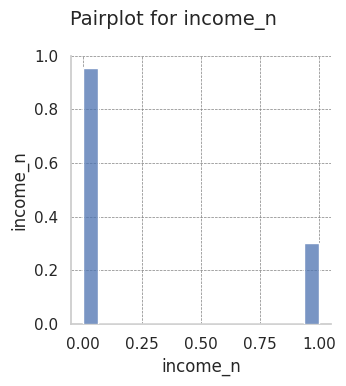

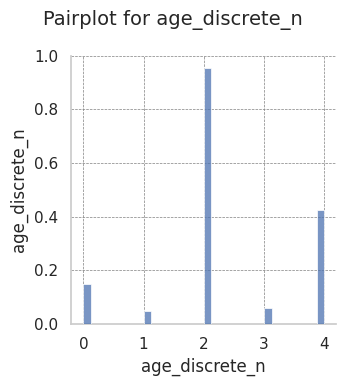

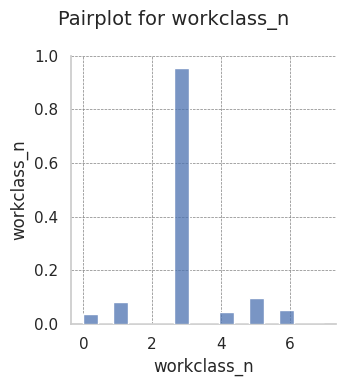

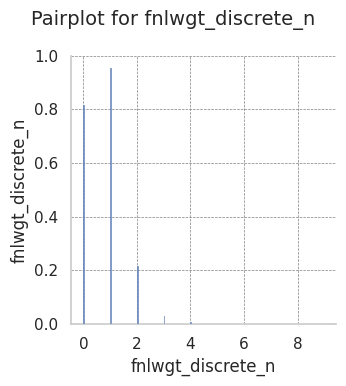

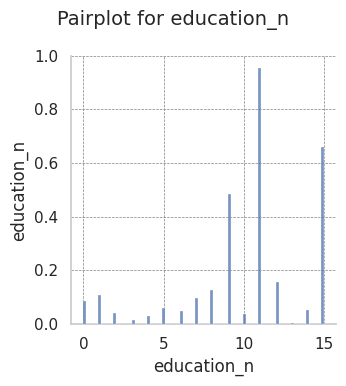

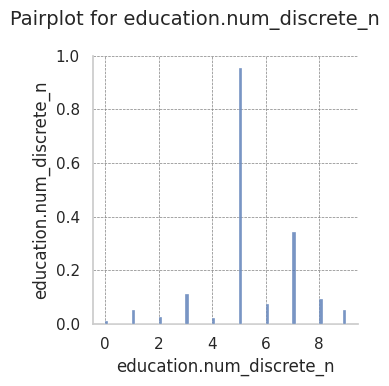

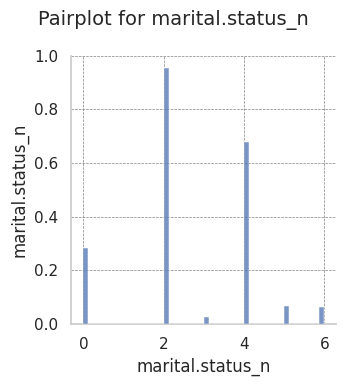

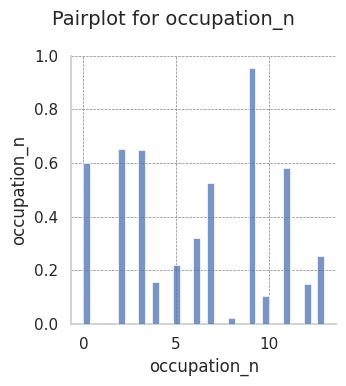

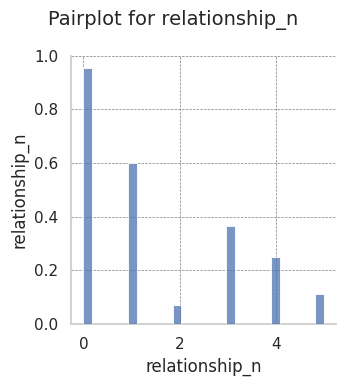

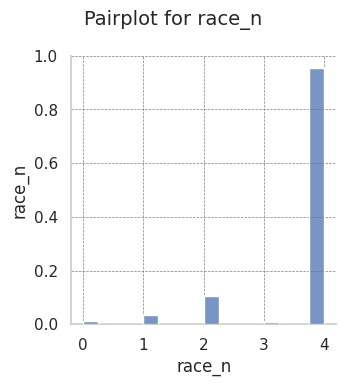

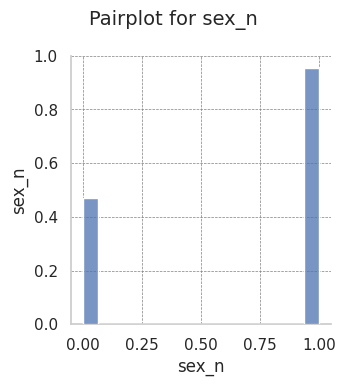

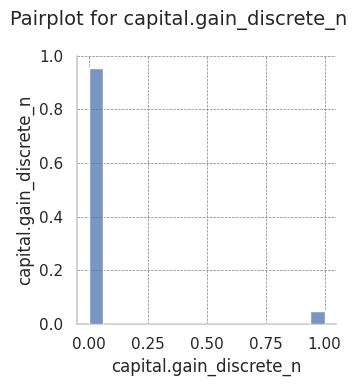

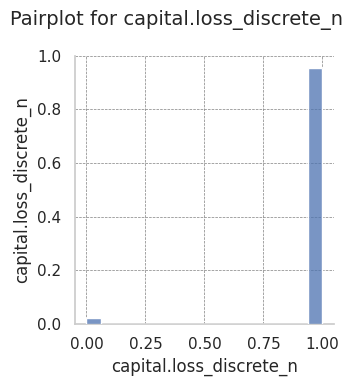

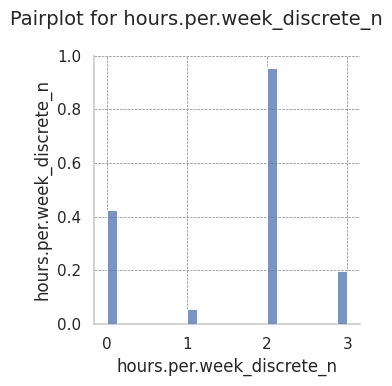

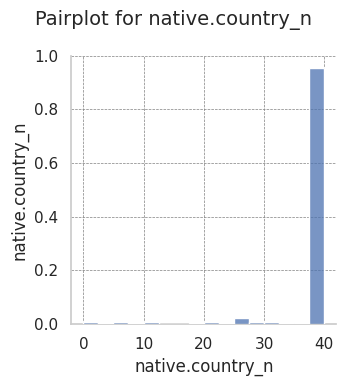

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme for Seaborn
sns.set_theme(style="whitegrid")

# Use a custom color palette
palette = sns.color_palette("coolwarm", as_cmap=True)

for col in discrete_data.columns:
    g = sns.pairplot(discrete_data, vars=[col], palette=palette, height=3.5) # Reduced height for smaller plots
    g.fig.suptitle(f'Pairplot for {col}', size=14, y=1.08) # Adjusted font size and title position

    # Enhance the grid aesthetics
    for ax in g.axes.flat:
        ax.grid(color='gray', linestyle='--', linewidth=0.5)

    plt.show()


## Correlation Matrix

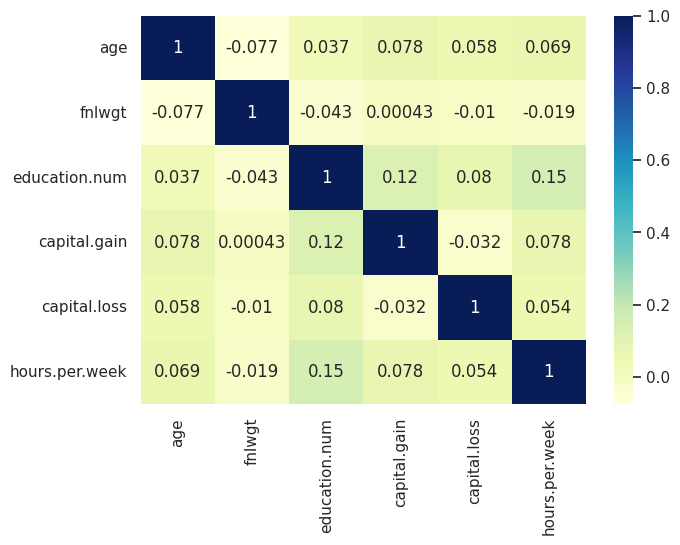

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()






# Step 5 : Train-Test Split



In [ ]:
y = discrete_data['income_n'] ## Outcome varible 'y' is the Class feature.
X = discrete_data.drop('income_n',axis=1) ## 'x' stores the remaining features.


## Train Test Split

In [ ]:

dt_x_train, dt_x_test, dt_y_train, dt_y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [ ]:
dt_x_train.head()

,age_discrete_n,workclass_n,fnlwgt_discrete_n,education_n,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
29313,2,3,0,15,5,2,11,0,4,1,0,1,0,38
16021,0,3,1,15,5,4,6,4,4,1,0,1,2,38
905,2,3,0,15,5,0,3,1,4,1,0,1,0,38
31251,4,3,0,9,7,2,11,0,4,1,0,1,2,38
3368,2,3,0,15,5,4,13,1,4,1,1,1,2,38


In [ ]:
dt_y_train.head()

29313    1
16021    0
905      0
31251    1
3368     0
Name: income_n, dtype: int64

# Step 6: Model Fitting and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_x_ax=[];
rfc_y_ax_test=[];
rfc_y_ax_train=[]

# Number of features
n=dt_x_train.shape[1]

for i in range(n, 1, -1):
    rfc=RandomForestClassifier(max_depth=i)
    rfc.fit(dt_x_train, dt_y_train)
    rfc_x_ax.append(i)
    rfc_y_ax_test.append(rfc.score(dt_x_test, dt_y_test))
    rfc_y_ax_train.append(rfc.score(dt_x_train, dt_y_train))

####*Graph obtained by RFC*

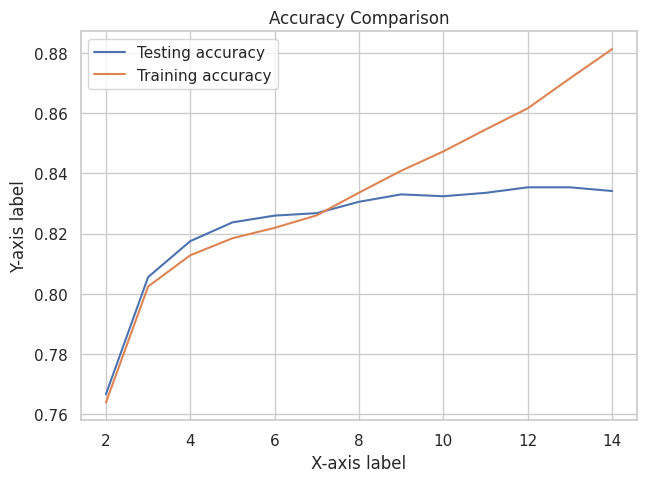

In [ ]:
plt.plot(rfc_x_ax,rfc_y_ax_test, label = "Testing accuracy")
plt.plot(rfc_x_ax,rfc_y_ax_train,  label = "Training accuracy")

# Add labels for the x-axis and y-axis
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")

# Add a title to the plot
plt.title("Accuracy Comparison")

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

####*Training Accuracy*

In [ ]:
y_pred = rfc.predict(dt_x_train)
from sklearn.metrics import accuracy_score
round((accuracy_score(dt_y_train,y_pred))*100,2 ).astype(str)+'%'

'86.37%'

####*Testing Accuracy*

In [ ]:
y_pred = rfc.predict(dt_x_test)
from sklearn.metrics import accuracy_score
round((accuracy_score(dt_y_test,y_pred))*100,2).astype(str)+'%'

'81.46%'